In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1999-01-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.061413,0.0000,0.742285,0.734467,0.911793,0.896788,0.754677,0.726411,1.000000,0.981686,0.786902,0.725754,0.739139,0.398443,3.0
1,1999-02-28 00:00:00,1.00000,#VALUE!,#VALUE!,0.822168,0.8923,1.000000,1.000000,1.000000,1.000000,0.977482,0.950245,1.000000,1.000000,0.917165,0.888962,0.853224,0.502272,3.0
2,1999-03-31 00:00:00,1.00000,#VALUE!,#VALUE!,1.000000,1.0000,0.887461,0.894749,0.846522,0.876495,0.966473,0.916707,1.000000,1.000000,0.818541,0.754026,0.815425,0.469207,3.0
3,1999-04-30 00:00:00,0.91866,#VALUE!,#VALUE!,1.000000,1.0000,0.756134,0.787182,0.649044,0.635819,0.917259,0.875811,0.969175,0.952241,0.682769,0.549867,0.734817,0.375368,3.0
4,1999-05-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.043678,0.0000,0.331229,0.325447,0.536516,0.486732,0.699631,0.662173,0.737502,0.687860,0.570753,0.362783,0.542768,0.190791,3.0


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,256.000000,254.000000,254.000000,251.000000,251.000000,248.000000,248.000000,245.000000,245.000000,233.000000,233.000000,221.000000,221.000000,255.000000
mean,0.395713,0.497792,0.493628,0.511375,0.500867,0.512766,0.497830,0.507787,0.495017,0.500095,0.487434,0.504781,0.497593,2.564706
std,0.269082,0.209246,0.211150,0.233158,0.229447,0.213667,0.212037,0.227149,0.227807,0.200797,0.234734,0.244943,0.232889,1.058677
min,-0.237986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.228001,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.309549,0.517296,0.509105,0.521826,0.521492,0.518177,0.502495,0.501572,0.495088,0.495392,0.517583,0.487873,0.540138,3.000000
75%,0.523819,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              221 non-null    object 
 1   OAS                               205 non-null    float64
 2   Excess Return % 3-mo (Treasury)   221 non-null    float64
 3   Excess Return % 3-mo (Agg)        221 non-null    float64
 4   Excess Return % 6-mo (Treasury)   221 non-null    float64
 5   Excess Return % 6-mo (Agg)        221 non-null    float64
 6   Excess Return % 9-mo (Treasury)   221 non-null    float64
 7   Excess Return % 9-mo (Agg)        221 non-null    float64
 8   Excess Return % 12-mo (Treasury)  221 non-null    float64
 9   Excess Return % 12-mo (Agg)       221 non-null    float64
 10  Excess Return % 24-mo (Treasury)  221 non-null    float64
 11  Excess Return % 24-mo (Agg)       221 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 75th percentile (top 25%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 75th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.75) # every data point over the 75th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.515914292


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.724042,0.538474,0.494571,0.546108,0.466925,0.561368,0.466444,0.572443,0.457277,0.559444,0.417165,0.632939,0.441815,2.882353
std,0.123823,0.286801,0.308006,0.310743,0.342460,0.260548,0.302899,0.262702,0.324393,0.228835,0.343379,0.251196,0.329244,0.972565
min,0.520907,0.000000,0.000000,0.000000,0.000000,0.129939,0.000000,0.130558,0.000000,0.088057,0.000000,0.190742,0.000000,1.000000
25%,0.634075,0.296517,0.211848,0.297949,0.174047,0.347780,0.210418,0.380161,0.174846,0.375666,0.021053,0.441994,0.121897,2.000000
50%,0.703973,0.608032,0.545003,0.525938,0.455256,0.492095,0.355966,0.497411,0.365179,0.600016,0.522175,0.612914,0.385404,3.000000
75%,0.805492,0.744911,0.726624,0.844697,0.789074,0.829055,0.757661,0.774266,0.744865,0.723358,0.675065,0.866135,0.675339,4.000000
max,0.983566,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 3-mo (Treasury)   51.0  0.538474  0.286801  0.040160   
 2                         combined  102.0  0.631258  0.238756  0.023640   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.457810  0.619138  
 2   0.584362  0.678154  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1856
 1                              Degrees of freedom =   100.0000
 2                                               t =     4.2422
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8401
 7                                       Hedge's g =     0.8338
 8           

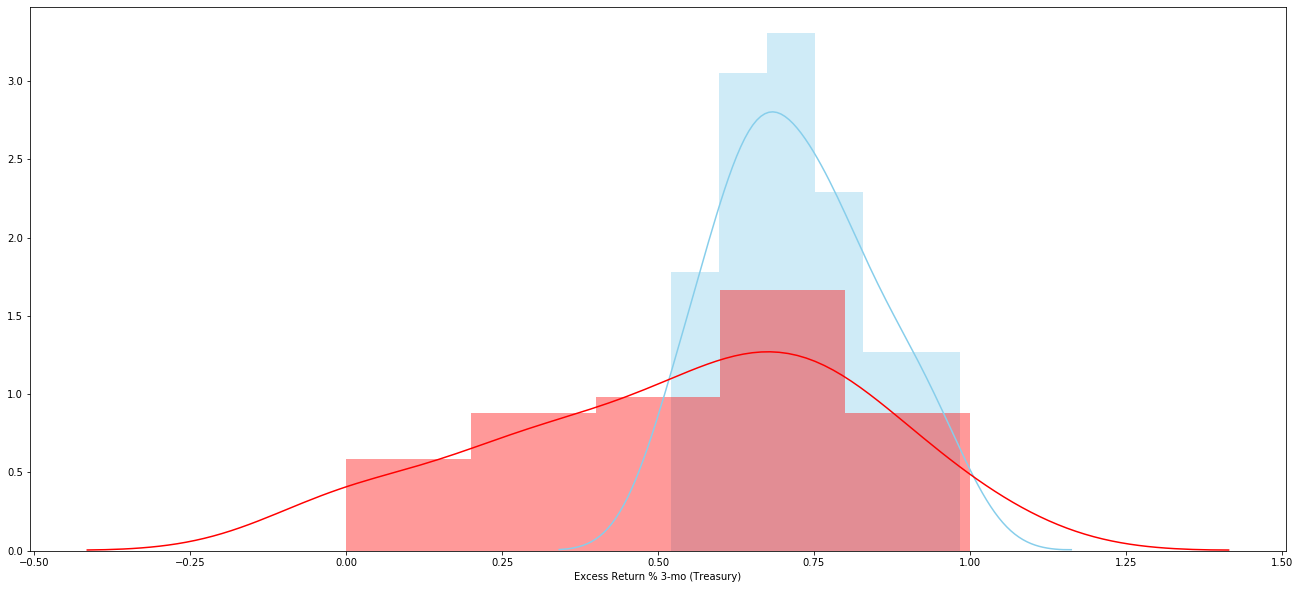

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   51.0  0.724042  0.123823  0.017339   0.689216   
 1  Excess Return % 3-mo (Agg)   51.0  0.494571  0.308006  0.043129   0.407943   
 2                    combined  102.0  0.609306  0.260478  0.025791   0.558144   
 
    Interval  
 0  0.758868  
 1  0.581199  
 2  0.660469  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2295
 1                             Degrees of freedom =   100.0000
 2                                              t =     4.9366
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.9776
 7                                      Hedge's g =     0.9702
 8                                  Glass'

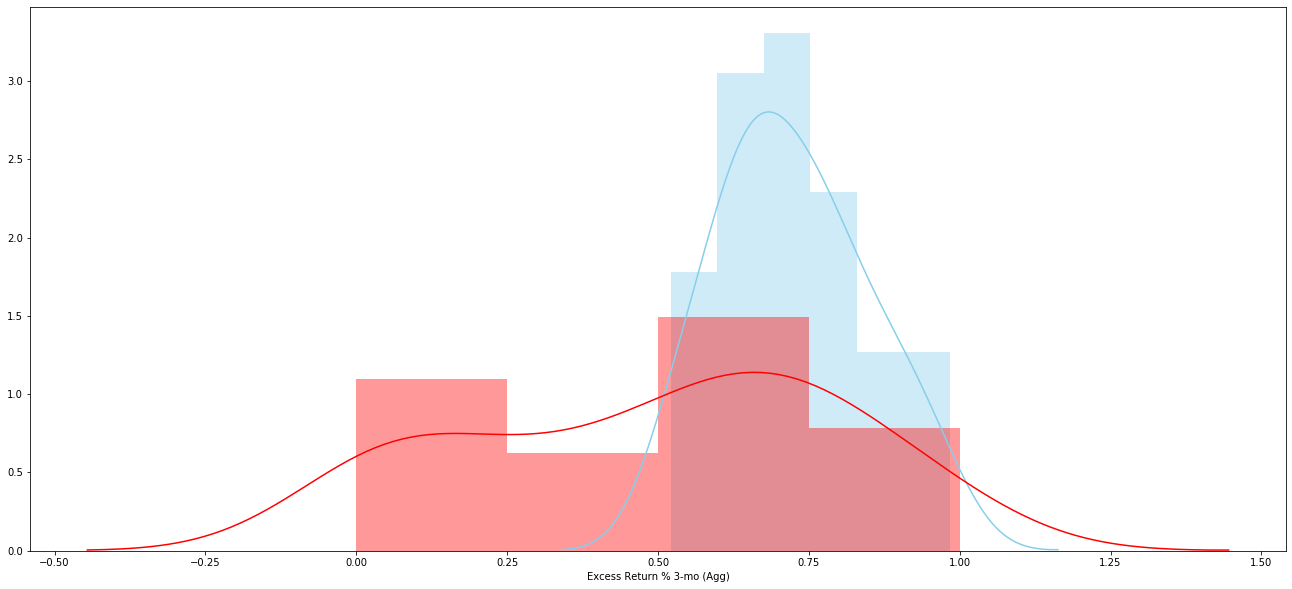

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 6-mo (Treasury)   51.0  0.546108  0.310743  0.043513   
 2                         combined  102.0  0.635075  0.251766  0.024929   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.458710  0.633506  
 2   0.585624  0.684527  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1779
 1                              Degrees of freedom =   100.0000
 2                                               t =     3.7988
 3                           Two side test p value =     0.0002
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.7523
 7                                       Hedge's g =     0.7466
 8           

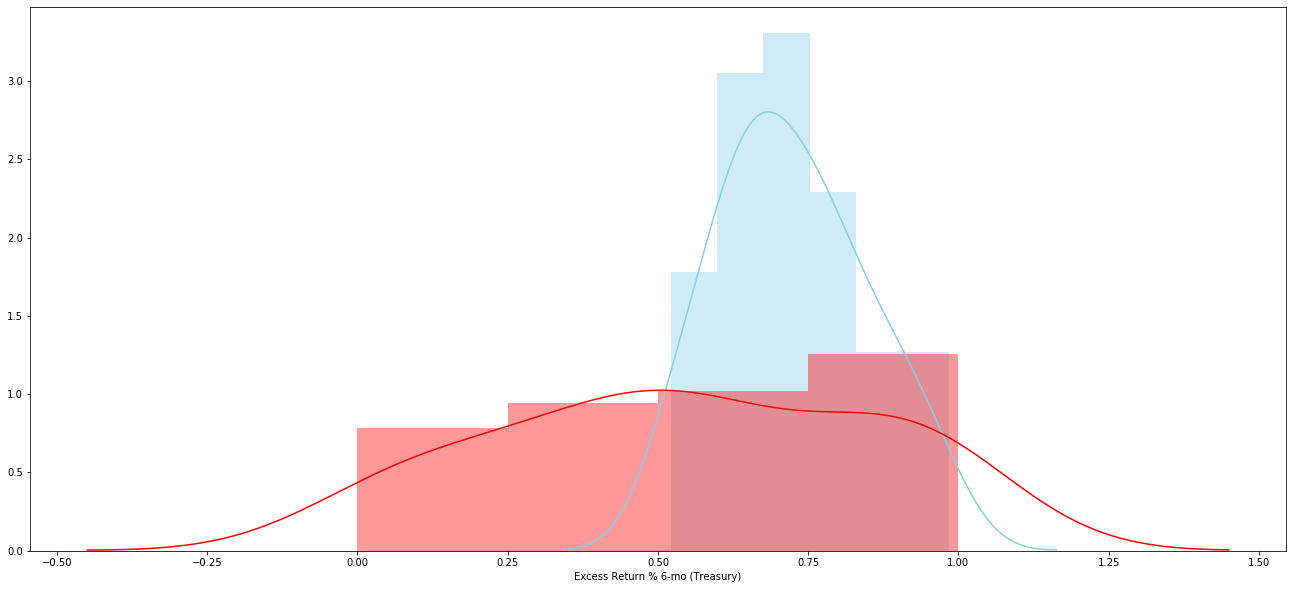

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   51.0  0.724042  0.123823  0.017339   0.689216   
 1  Excess Return % 6-mo (Agg)   51.0  0.466925  0.342460  0.047954   0.370607   
 2                    combined  102.0  0.595484  0.286949  0.028412   0.539121   
 
    Interval  
 0  0.758868  
 1  0.563243  
 2  0.651846  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2571
 1                             Degrees of freedom =   100.0000
 2                                              t =     5.0423
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     0.9985
 7                                      Hedge's g =     0.9910
 8                                  Glass'

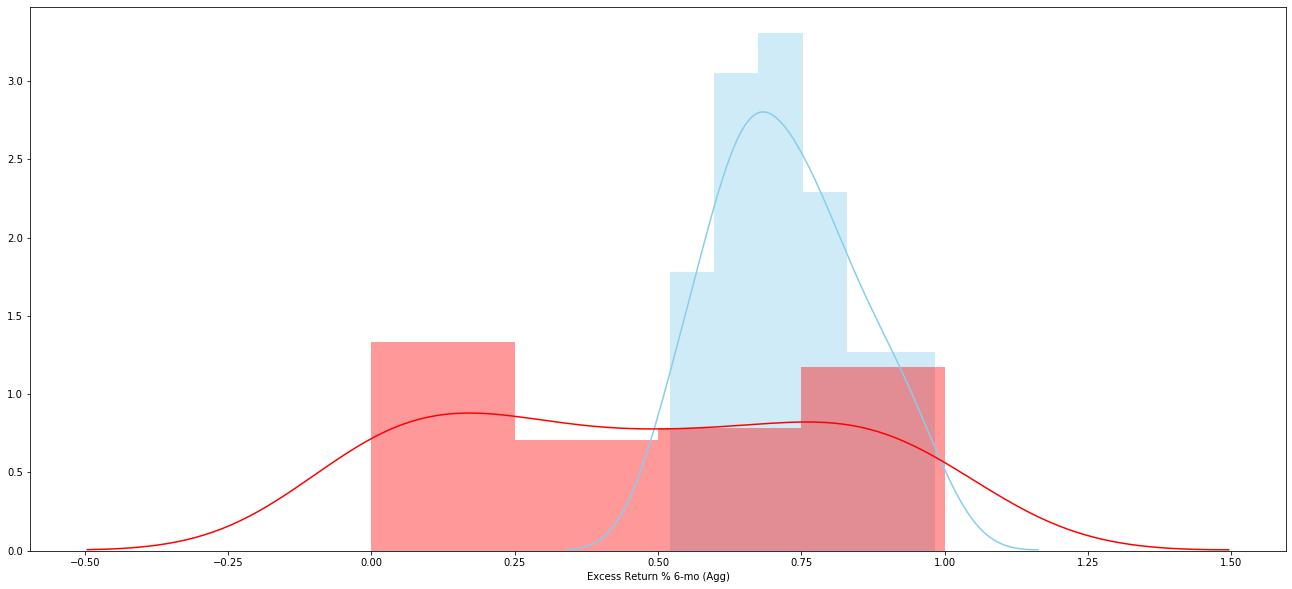

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 9-mo (Treasury)   51.0  0.561368  0.260548  0.036484   
 2                         combined  102.0  0.642705  0.218810  0.021665   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.488087  0.634648  
 2   0.599726  0.685683  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1627
 1                              Degrees of freedom =   100.0000
 2                                               t =     4.0271
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.7975
 7                                       Hedge's g =     0.7915
 8           

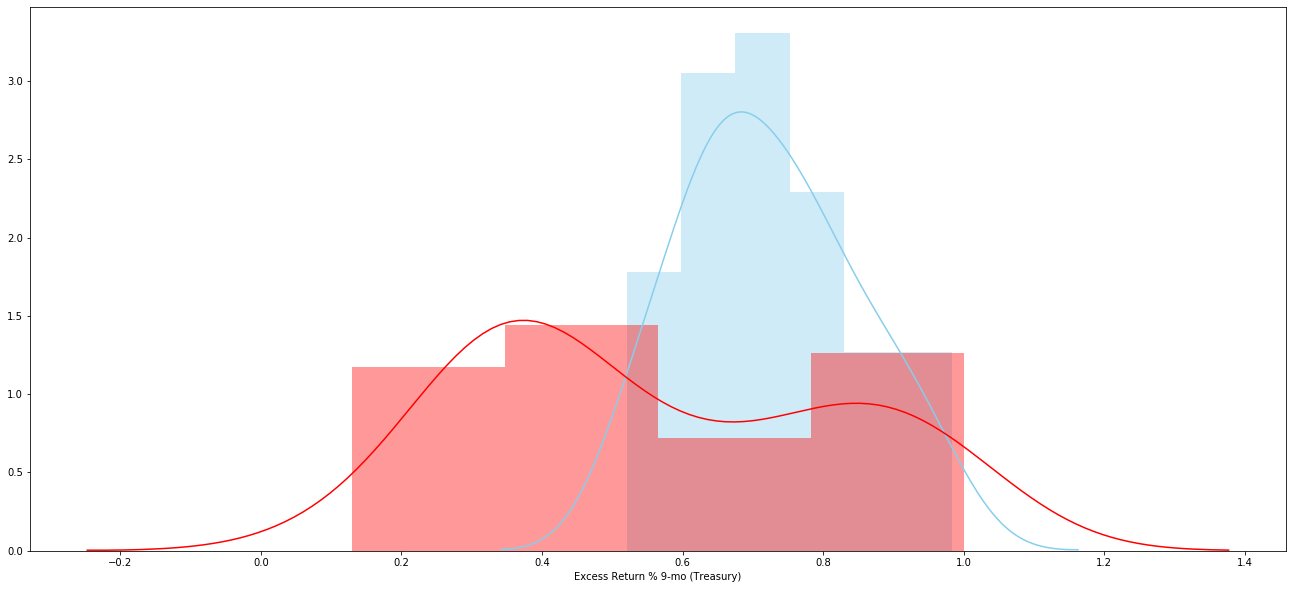

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   51.0  0.724042  0.123823  0.017339   0.689216   
 1  Excess Return % 9-mo (Agg)   51.0  0.466444  0.302899  0.042414   0.381252   
 2                    combined  102.0  0.595243  0.264127  0.026153   0.543364   
 
    Interval  
 0  0.758868  
 1  0.551636  
 2  0.647123  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2576
 1                             Degrees of freedom =   100.0000
 2                                              t =     5.6218
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1133
 7                                      Hedge's g =     1.1049
 8                                  Glass'

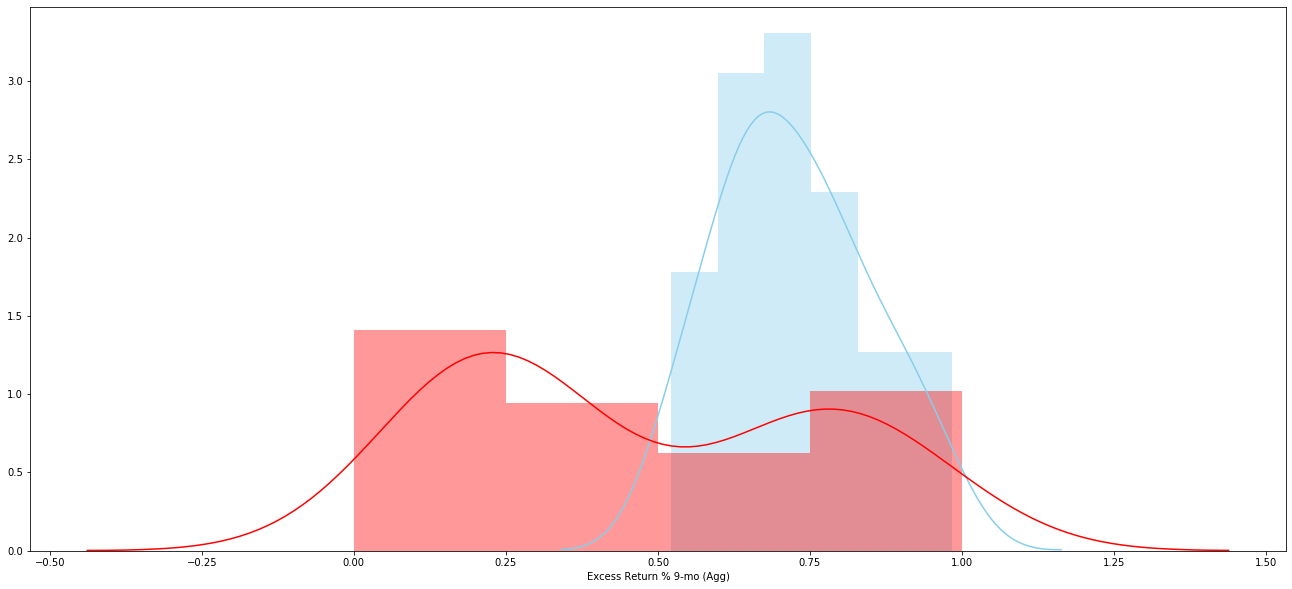

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 12-mo (Treasury)   51.0  0.572443  0.262702  0.036786   
 2                          combined  102.0  0.648243  0.218076  0.021593   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.498557  0.646330  
 2   0.605408  0.691077  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1516
 1                              Degrees of freedom =   100.0000
 2                                               t =     3.7278
 3                           Two side test p value =     0.0003
 4                          Difference < 0 p value =     0.9998
 5                          Difference > 0 p value =     0.0002
 6                                       Cohen's d =     0.7382
 7                                       Hedge's g =     0.7327
 8       

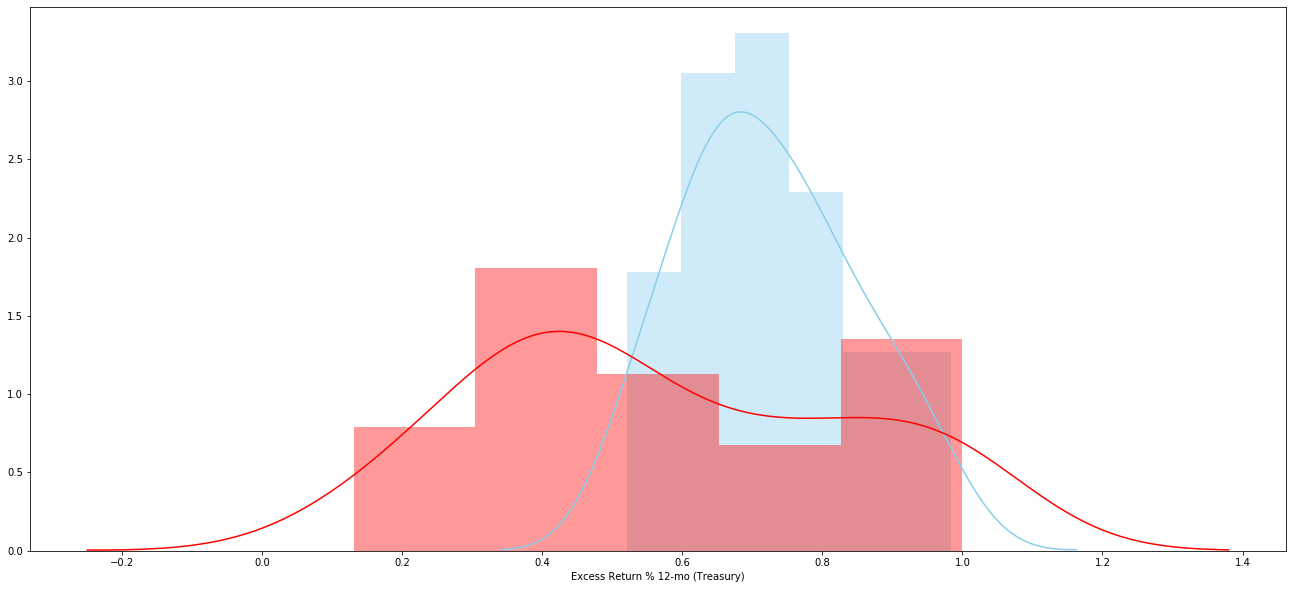

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 12-mo (Agg)   51.0  0.457277  0.324393  0.045424   
 2                     combined  102.0  0.590660  0.278661  0.027592   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.366040  0.548514  
 2   0.535926  0.645394  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2668
 1                              Degrees of freedom =   100.0000
 2                                               t =     5.4866
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0865
 7                                       Hedge's g =     1.0783
 8                           

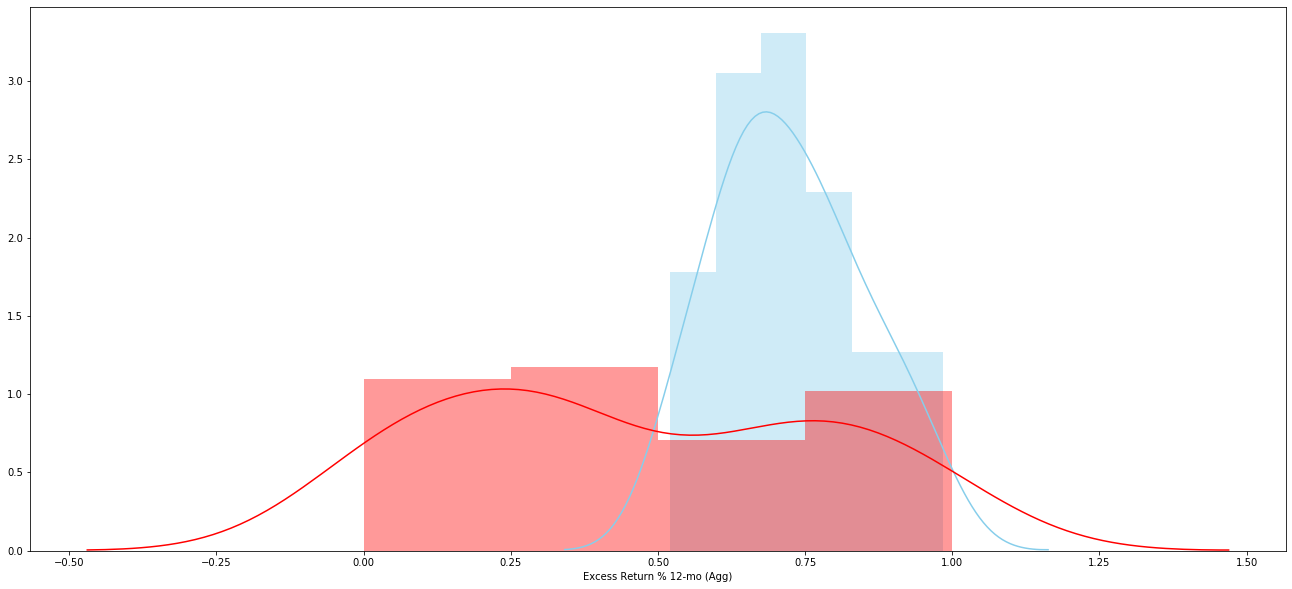

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 24-mo (Treasury)   51.0  0.559444  0.228835  0.032043   
 2                          combined  102.0  0.641743  0.200883  0.019890   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.495083  0.623805  
 2   0.602286  0.681200  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1646
 1                              Degrees of freedom =   100.0000
 2                                               t =     4.5178
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8946
 7                                       Hedge's g =     0.8879
 8       

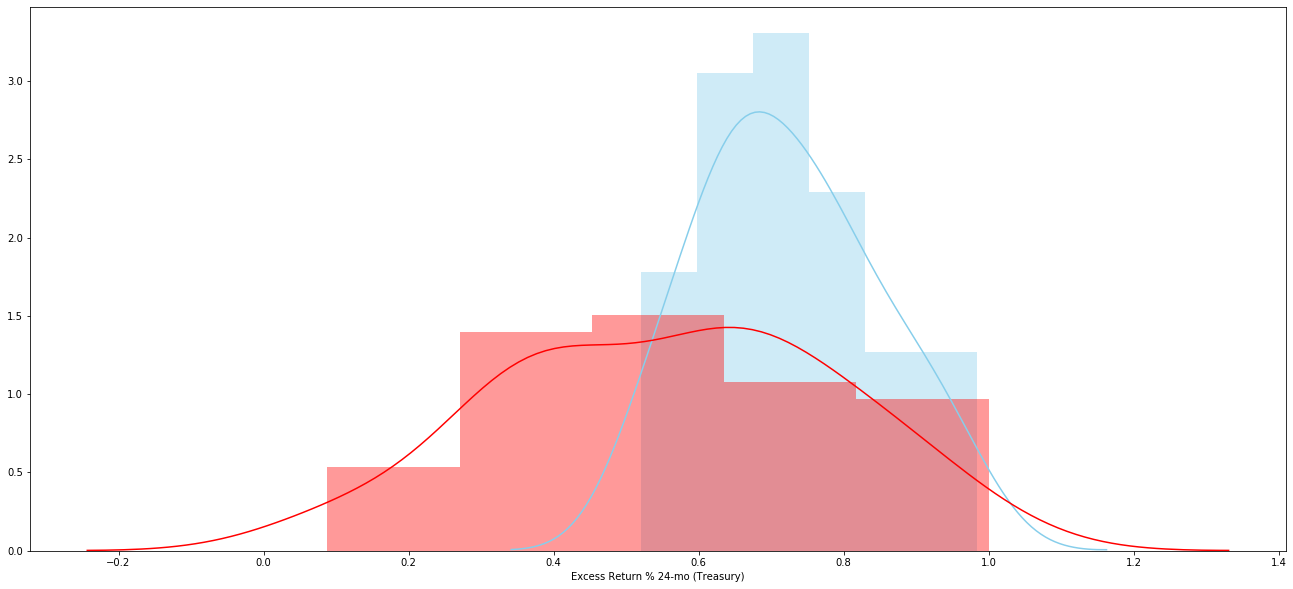

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 24-mo (Agg)   51.0  0.417165  0.343379  0.048083   
 2                     combined  102.0  0.570604  0.299562  0.029661   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.320588  0.513742  
 2   0.511764  0.629443  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.3069
 1                              Degrees of freedom =   100.0000
 2                                               t =     6.0038
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1889
 7                                       Hedge's g =     1.1800
 8                           

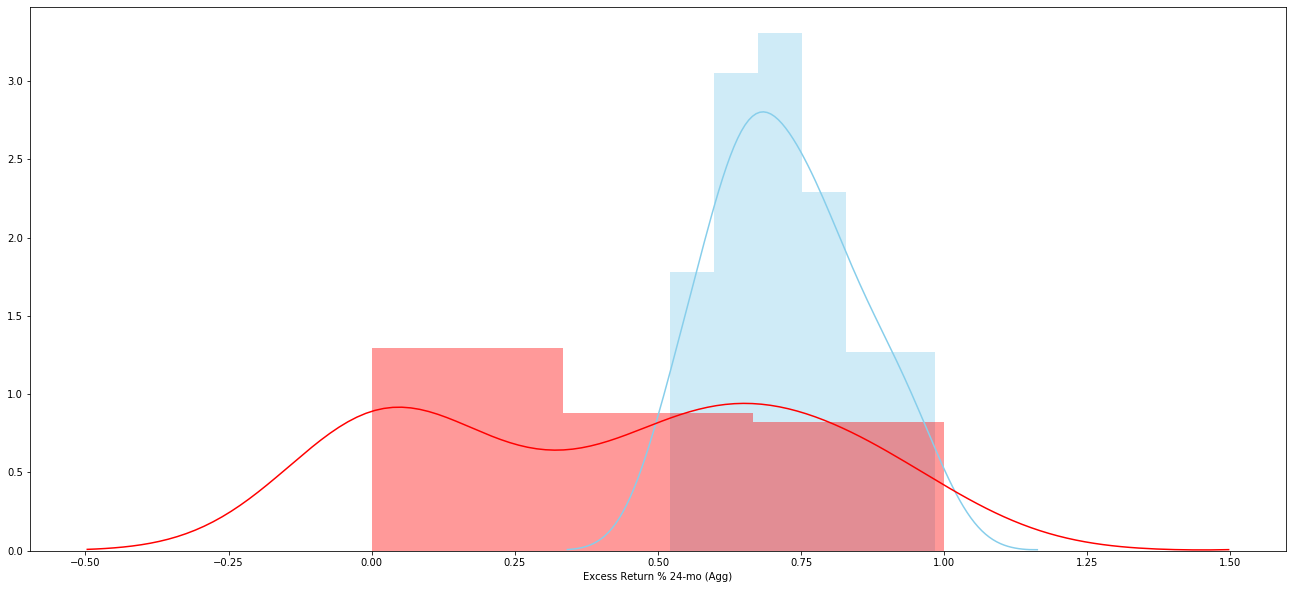

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 36-mo (Treasury)   51.0  0.632939  0.251196  0.035174   
 2                          combined  102.0  0.678491  0.202294  0.020030   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.562289  0.703589  
 2   0.638756  0.718225  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.0911
 1                              Degrees of freedom =   100.0000
 2                                               t =     2.3231
 3                           Two side test p value =     0.0222
 4                          Difference < 0 p value =     0.9889
 5                          Difference > 0 p value =     0.0111
 6                                       Cohen's d =     0.4600
 7                                       Hedge's g =     0.4566
 8       

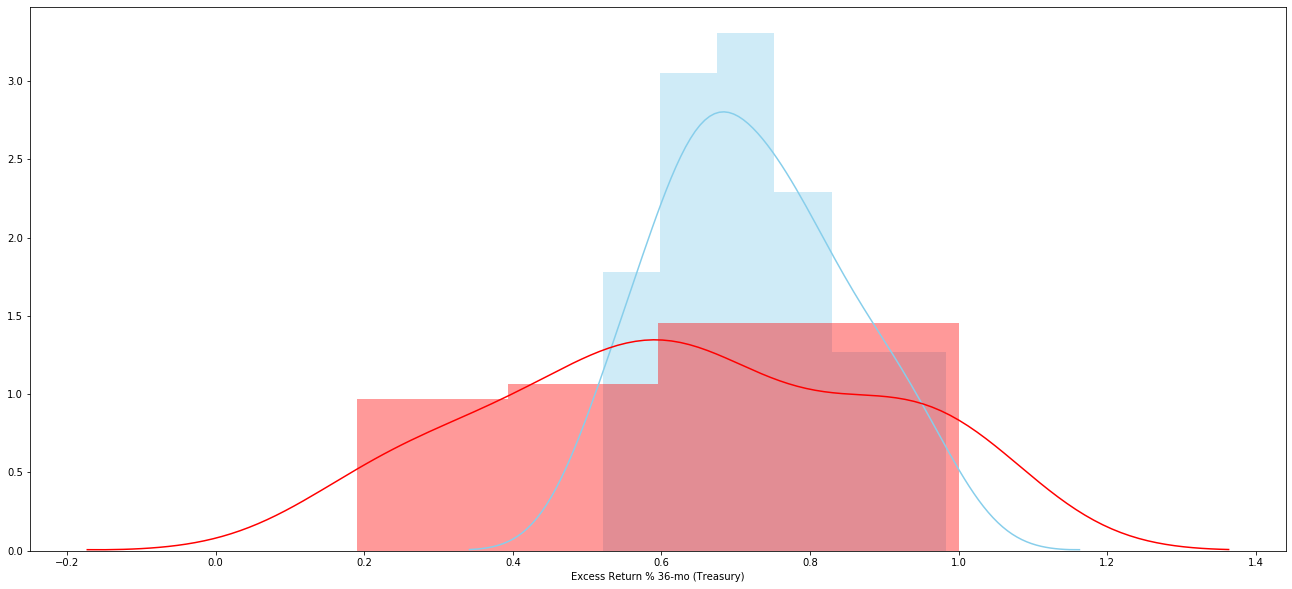

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 36-mo (Agg)   51.0  0.441815  0.329244  0.046103   
 2                     combined  102.0  0.582928  0.285245  0.028243   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.349213  0.534416  
 2   0.526901  0.638956  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2822
 1                              Degrees of freedom =   100.0000
 2                                               t =     5.7298
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1347
 7                                       Hedge's g =     1.1261
 8                           

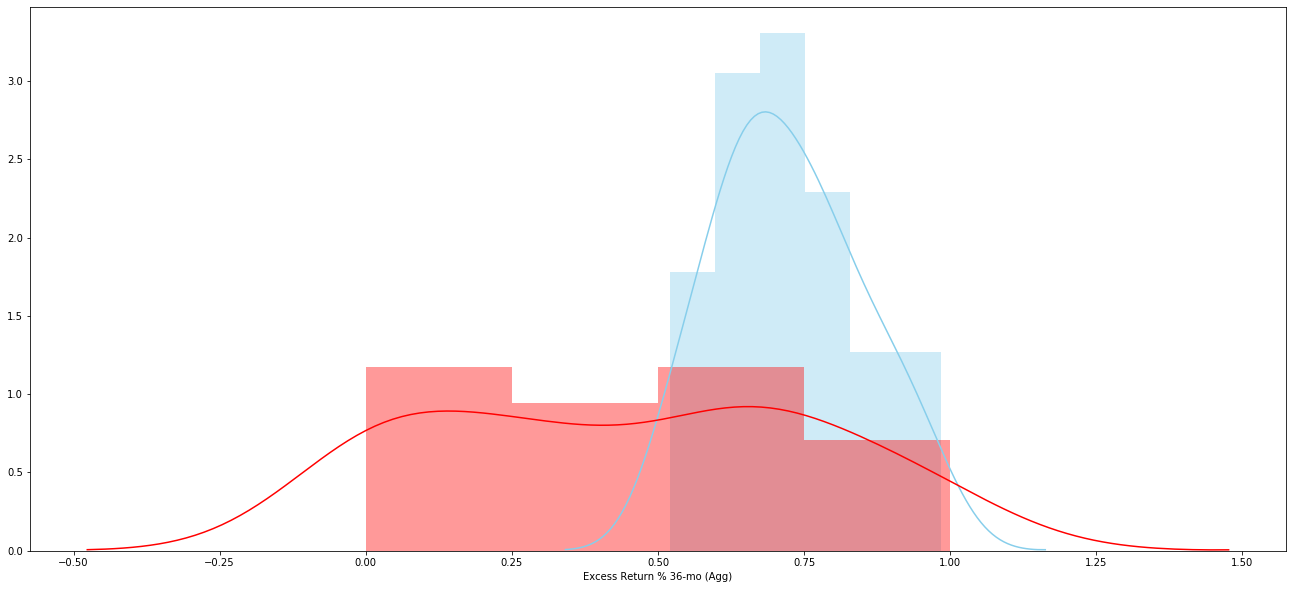

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,256.000000,256.000000,256.000000,254.000000,254.000000,251.000000,251.000000,248.000000,248.000000,245.000000,245.000000,233.000000,233.000000,221.000000,221.000000,255.000000
mean,0.395713,0.498948,0.495798,0.497792,0.493628,0.511375,0.500867,0.512766,0.497830,0.507787,0.495017,0.500095,0.487434,0.504781,0.497593,2.564706
std,0.269082,0.218167,0.231360,0.209246,0.211150,0.233158,0.229447,0.213667,0.212037,0.227149,0.227807,0.200797,0.234734,0.244943,0.232889,1.058677
min,-0.237986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.228001,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.309549,0.508152,0.508637,0.517296,0.509105,0.521826,0.521492,0.518177,0.502495,0.501572,0.495088,0.495392,0.517583,0.487873,0.540138,3.000000
75%,0.523819,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 3-mo (Treasury)  254.0  0.497792  0.209246  0.013129   
 2                         combined  305.0  0.535624  0.214737  0.012296   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.471936  0.523649  
 2   0.511429  0.559820  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2262
 1                              Degrees of freedom =   303.0000
 2                                               t =     7.4579
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1444
 7                                       Hedge's g =     1.1415
 8           

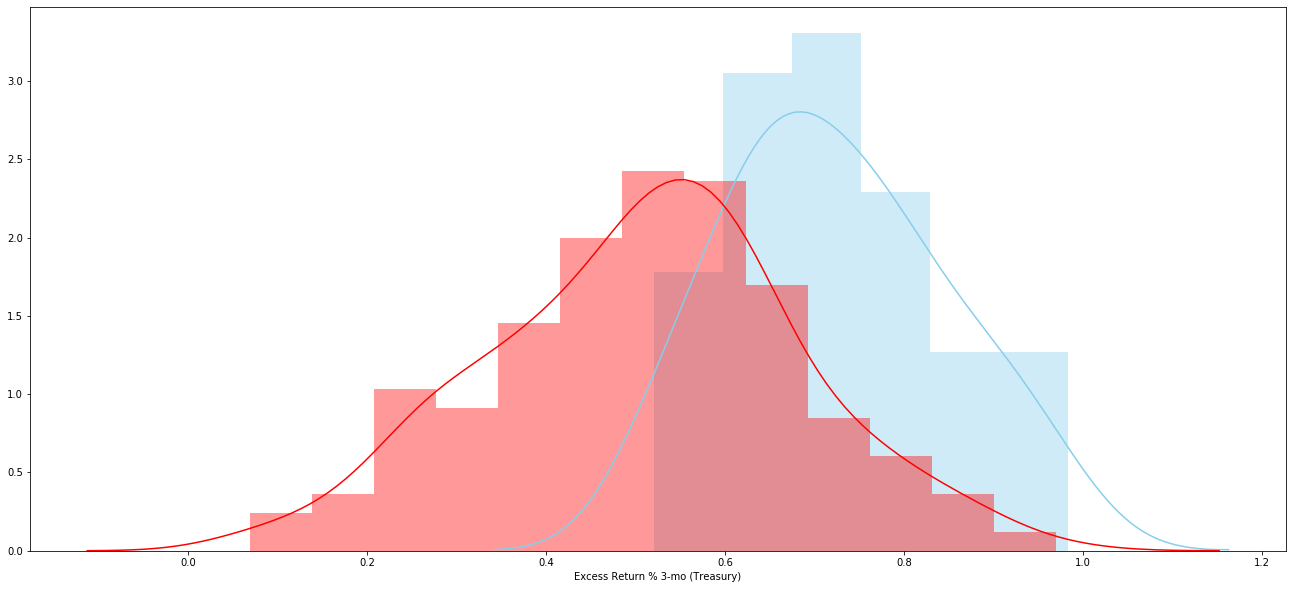

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   51.0  0.724042  0.123823  0.017339   0.689216   
 1  Excess Return % 3-mo (Agg)  254.0  0.493628  0.211150  0.013249   0.467536   
 2                    combined  305.0  0.532156  0.216896  0.012419   0.507718   
 
    Interval  
 0  0.758868  
 1  0.519720  
 2  0.556595  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2304
 1                             Degrees of freedom =   303.0000
 2                                              t =     7.5310
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1556
 7                                      Hedge's g =     1.1527
 8                                  Glass'

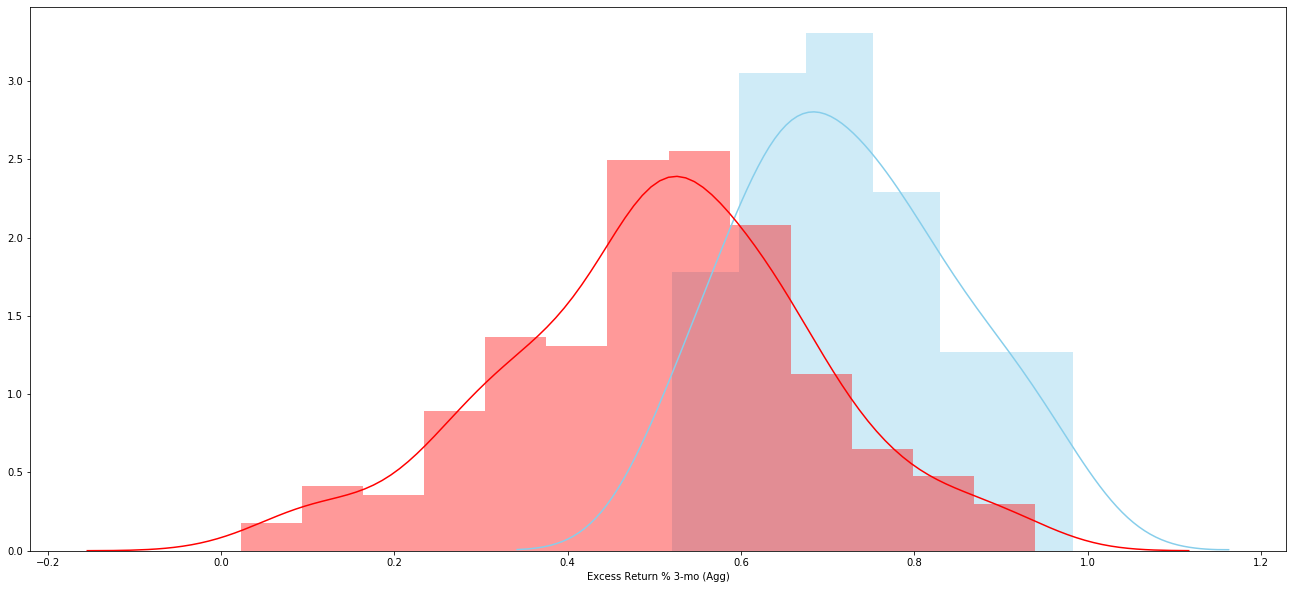

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 6-mo (Treasury)  251.0  0.511375  0.233158  0.014717   
 2                         combined  302.0  0.547289  0.232524  0.013380   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.482390  0.540359  
 2   0.520958  0.573619  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2127
 1                              Degrees of freedom =   300.0000
 2                                               t =     6.3291
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9721
 7                                       Hedge's g =     0.9697
 8           

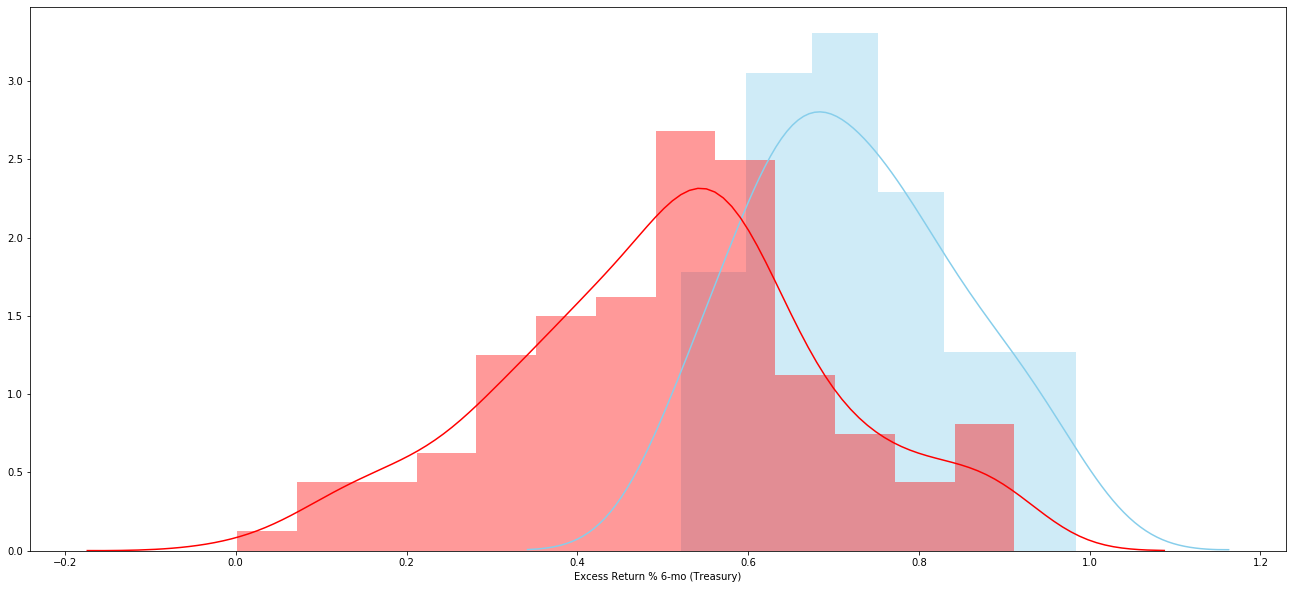

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   51.0  0.724042  0.123823  0.017339   0.689216   
 1  Excess Return % 6-mo (Agg)  251.0  0.500867  0.229447  0.014483   0.472343   
 2                    combined  302.0  0.538555  0.230839  0.013283   0.512415   
 
    Interval  
 0  0.758868  
 1  0.529390  
 2  0.564695  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2232
 1                             Degrees of freedom =   300.0000
 2                                              t =     6.7434
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.0358
 7                                      Hedge's g =     1.0332
 8                                  Glass'

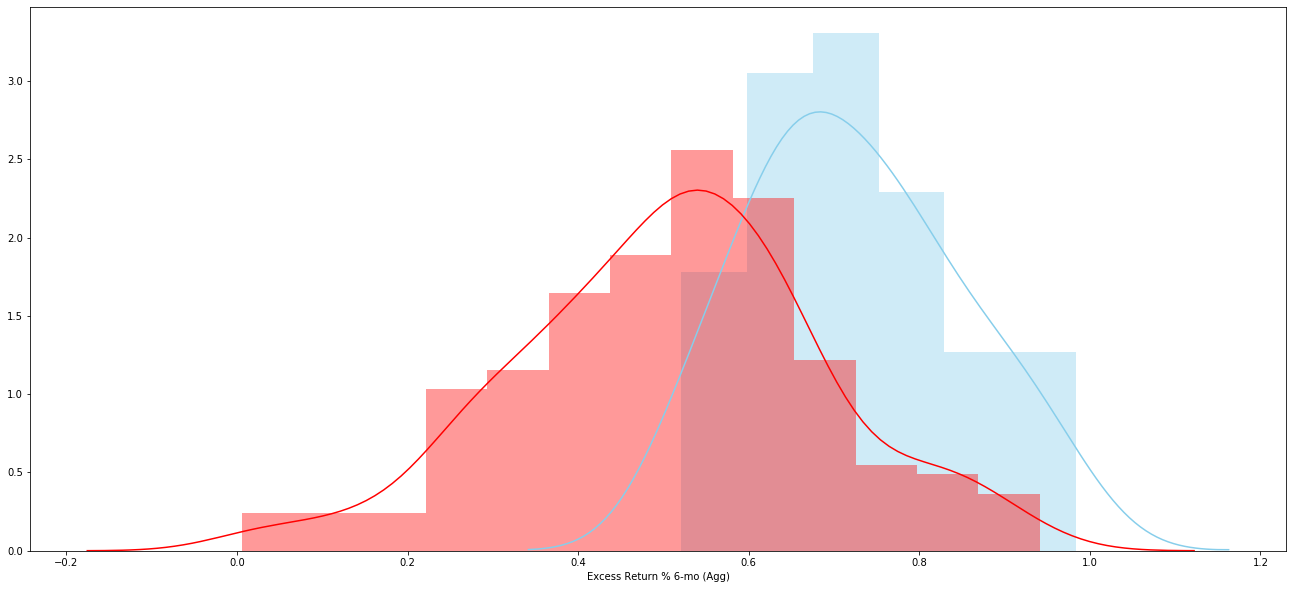

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 9-mo (Treasury)  248.0  0.512766  0.213667  0.013568   
 2                         combined  299.0  0.548803  0.216216  0.012504   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.486042  0.539489  
 2   0.524195  0.573410  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2113
 1                              Degrees of freedom =   297.0000
 2                                               t =     6.8240
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0492
 7                                       Hedge's g =     1.0466
 8           

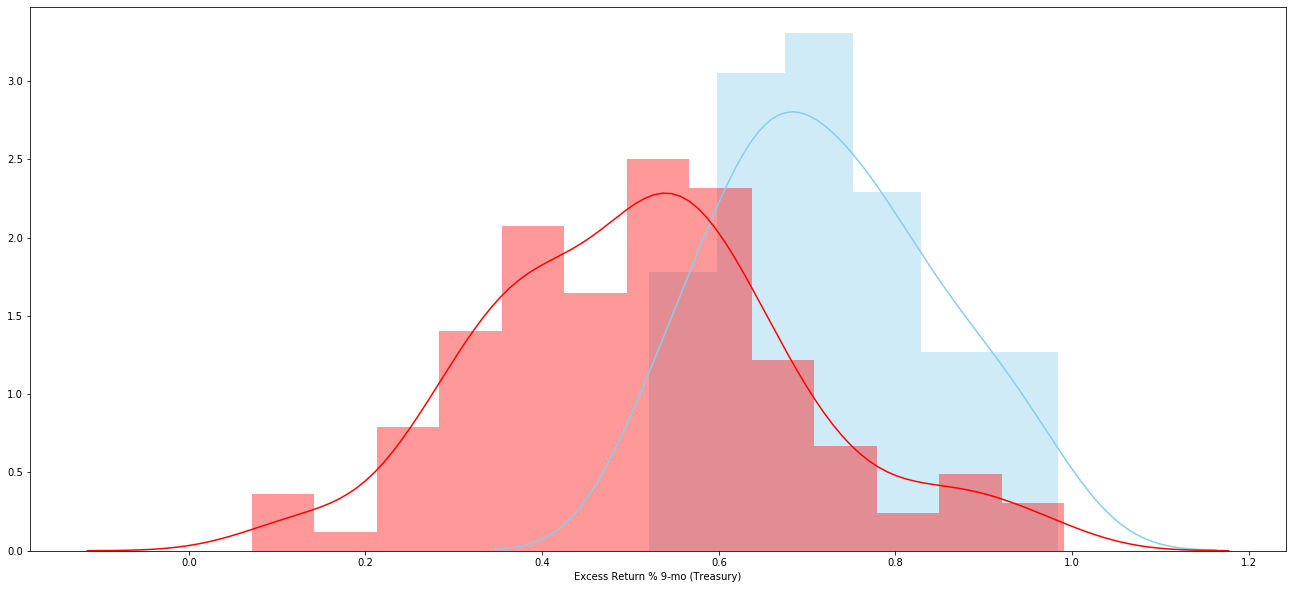

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   51.0  0.724042  0.123823  0.017339   0.689216   
 1  Excess Return % 9-mo (Agg)  248.0  0.497830  0.212037  0.013464   0.471310   
 2                    combined  299.0  0.536415  0.217029  0.012551   0.511715   
 
    Interval  
 0  0.758868  
 1  0.524350  
 2  0.561115  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2262
 1                             Degrees of freedom =   297.0000
 2                                              t =     7.3589
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1315
 7                                      Hedge's g =     1.1286
 8                                  Glass'

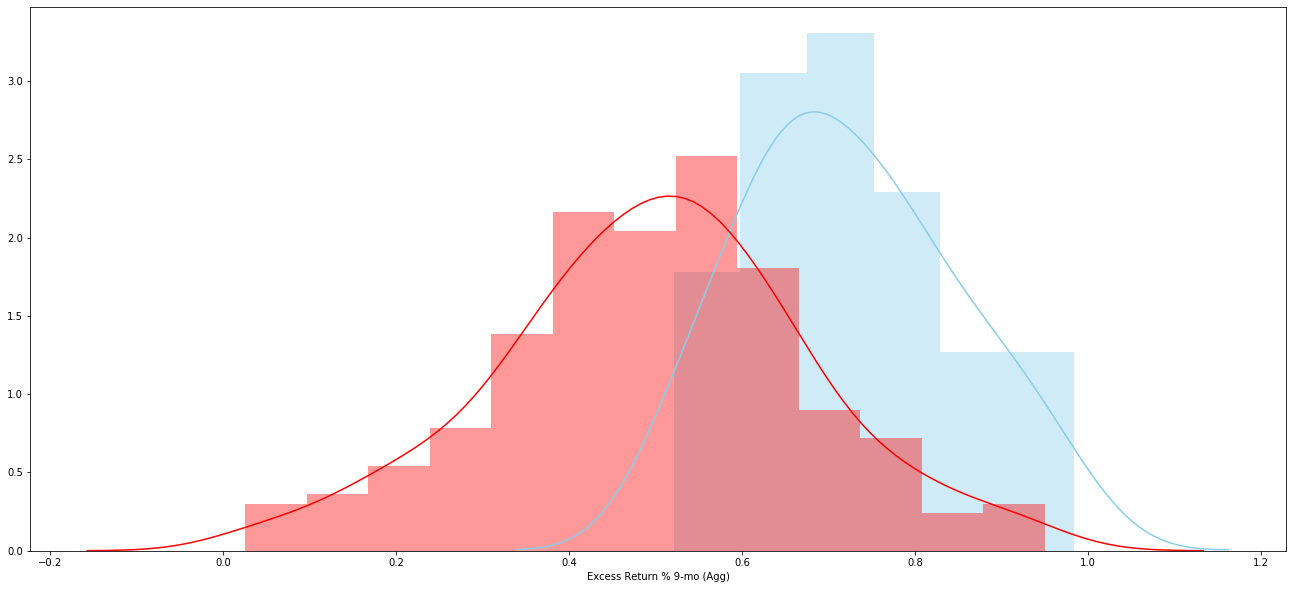

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 12-mo (Treasury)  245.0  0.507787  0.227149  0.014512   
 2                          combined  296.0  0.545047  0.227963  0.013250   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.479203  0.536372  
 2   0.518971  0.571124  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2163
 1                              Degrees of freedom =   294.0000
 2                                               t =     6.5921
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0146
 7                                       Hedge's g =     1.0120
 8       

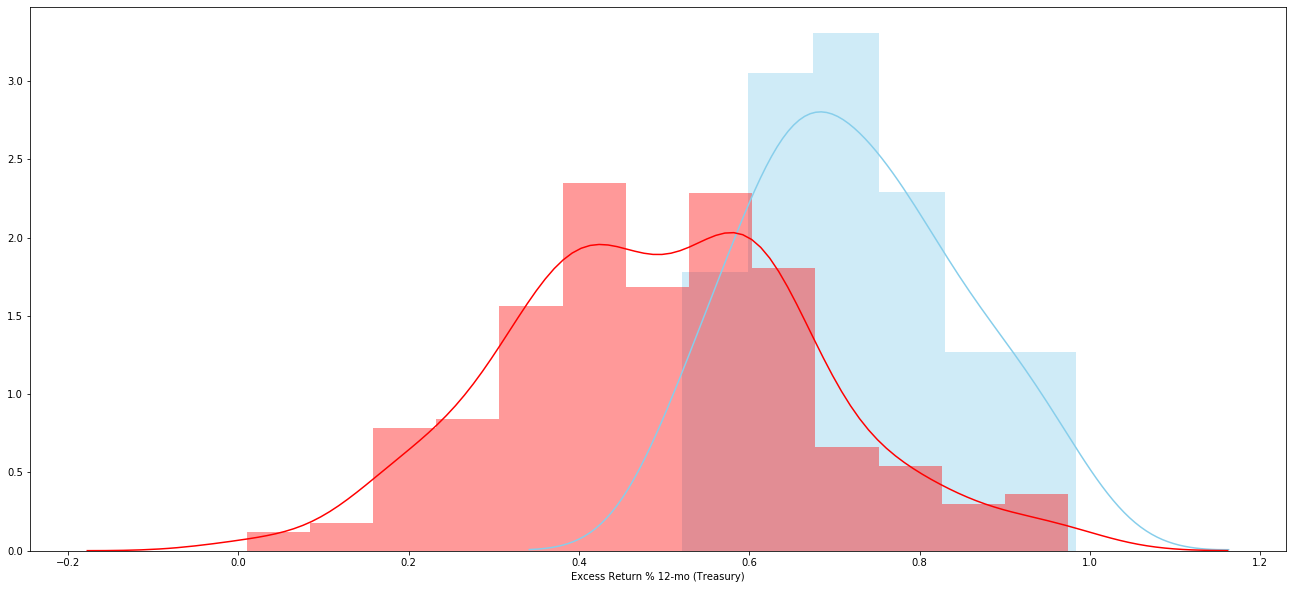

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 12-mo (Agg)  245.0  0.495017  0.227807  0.014554   
 2                     combined  296.0  0.534477  0.230279  0.013385   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.466349  0.523684  
 2   0.508135  0.560819  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2290
 1                              Degrees of freedom =   294.0000
 2                                               t =     6.9623
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0716
 7                                       Hedge's g =     1.0689
 8                           

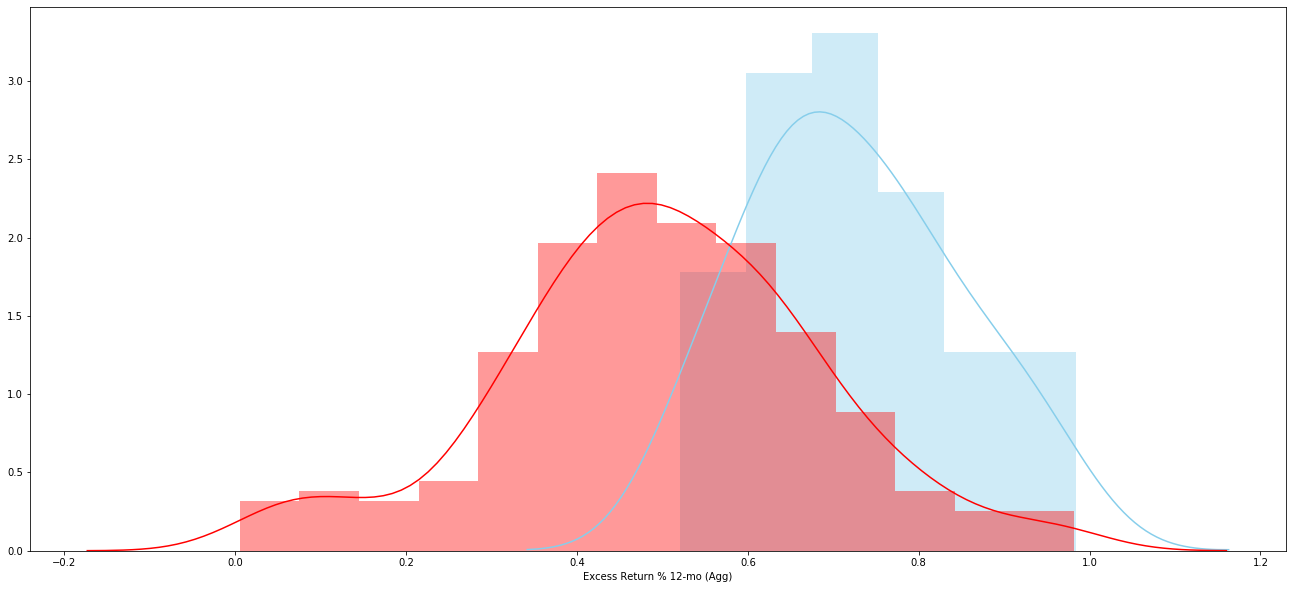

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 24-mo (Treasury)  233.0  0.500095  0.200797  0.013155   
 2                          combined  284.0  0.540311  0.207792  0.012330   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.474177  0.526013  
 2   0.516040  0.564581  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2239
 1                              Degrees of freedom =   282.0000
 2                                               t =     7.6466
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1821
 7                                       Hedge's g =     1.1790
 8       

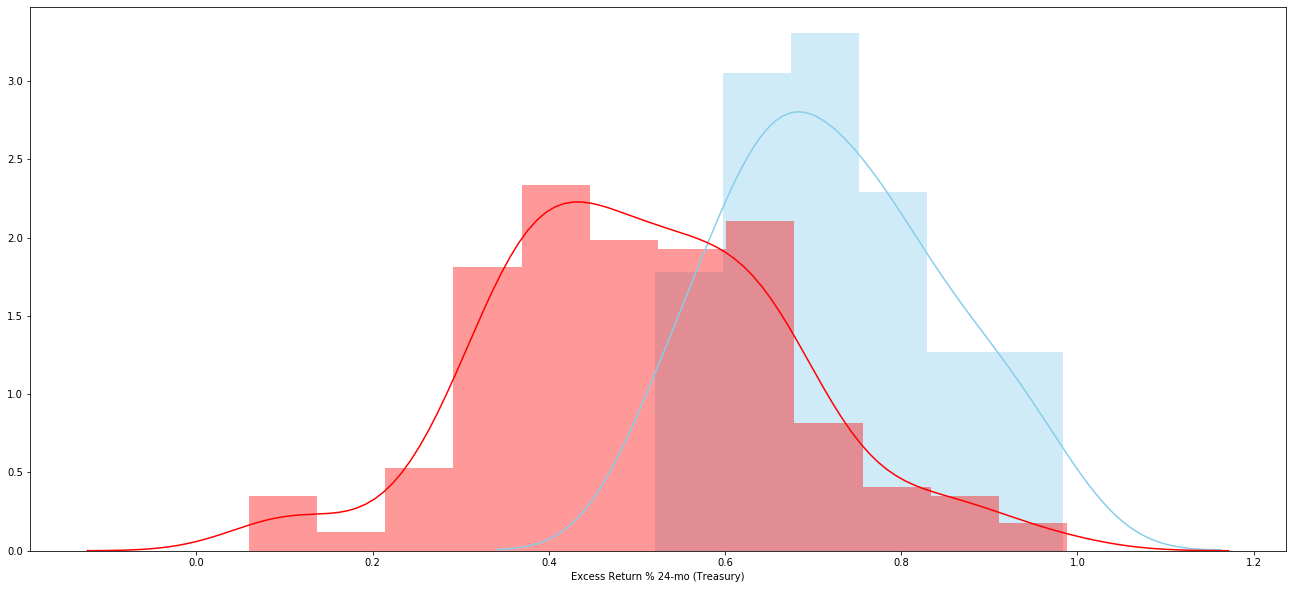

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 24-mo (Agg)  233.0  0.487434  0.234734  0.015378   
 2                     combined  284.0  0.529923  0.236973  0.014062   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.457135  0.517732  
 2   0.502244  0.557602  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2366
 1                              Degrees of freedom =   282.0000
 2                                               t =     6.9822
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0794
 7                                       Hedge's g =     1.0765
 8                           

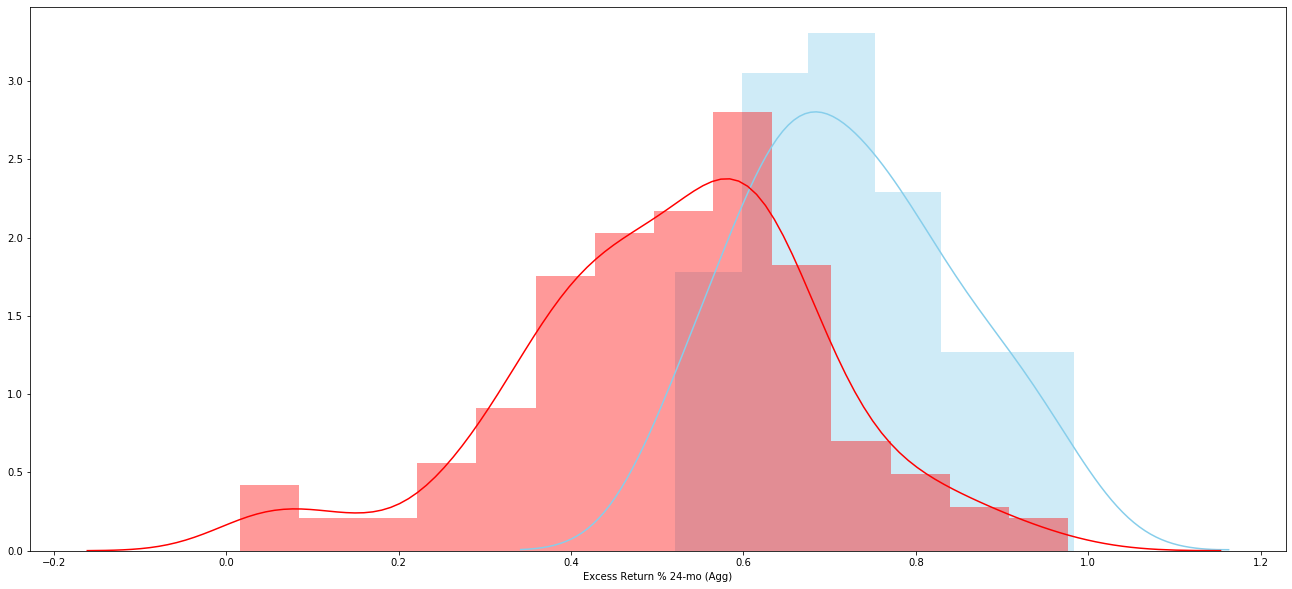

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 36-mo (Treasury)  221.0  0.504781  0.244943  0.016477   
 2                          combined  272.0  0.545893  0.242664  0.014714   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.472309  0.537254  
 2   0.516925  0.574860  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2193
 1                              Degrees of freedom =   270.0000
 2                                               t =     6.2059
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9641
 7                                       Hedge's g =     0.9614
 8       

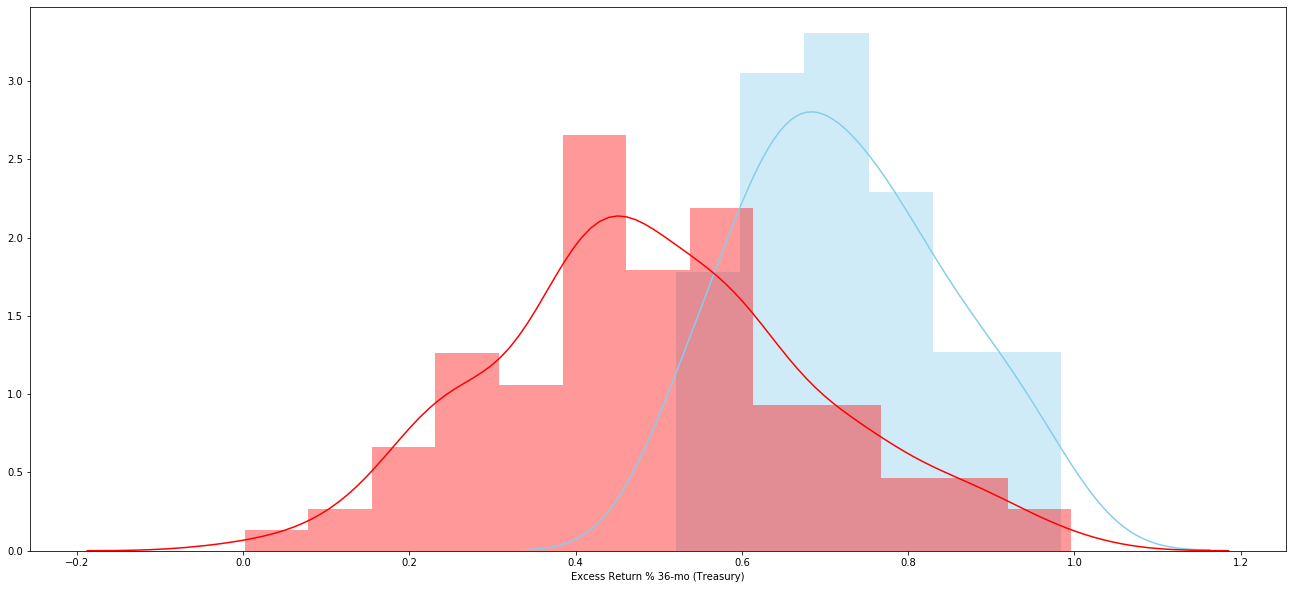

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   51.0  0.724042  0.123823  0.017339   
 1  Excess Return % 36-mo (Agg)  221.0  0.497593  0.232889  0.015666   
 2                     combined  272.0  0.540052  0.233880  0.014181   
 
    95% Conf.  Interval  
 0   0.689216  0.758868  
 1   0.466719  0.528467  
 2   0.512133  0.567971  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2264
 1                              Degrees of freedom =   270.0000
 2                                               t =     6.7215
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0442
 7                                       Hedge's g =     1.0413
 8                           

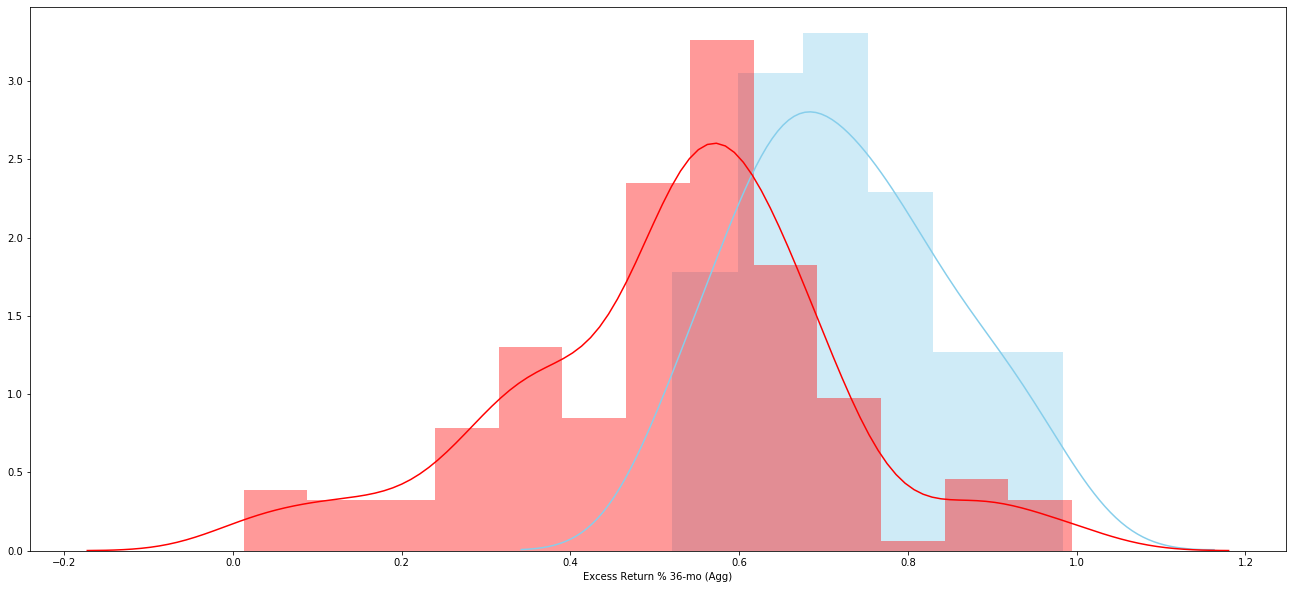

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")